# Проект 5 Выявление определяющих успешность игры закономерностей

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')

In [2]:
games.info()
games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Шаг 2. Подготовьте данные

# Приведение к нижнему регистру

In [3]:
games.set_axis(['name','platform','year_of_release','genre','na_sales', 'eu_sales', 'jp_sales','other_sales','critic_score','user_score','rating'],axis = 'columns',inplace = True)

In [4]:
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()

# Преобразование данных в нужные типы

In [5]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Удаление дубликатов

In [6]:
games = games.drop_duplicates().reset_index(drop = True)

# Работа с пропусками

Не достаточно данных, чтобы понять как заполнять пропуски. Для исследований мы можем делать срезы из выборок, где нет пропусков в нужных значениях.

# Подсчёт суммарных продаж во всех регионах

In [7]:
def add_total_sales(games):
    na_sales = games['na_sales']
    eu_sales = games['eu_sales']
    jp_sales = games['jp_sales']
    other_sales = games['other_sales']
    total_sales = na_sales + eu_sales + jp_sales + other_sales
    return total_sales
games['total_sales'] = games.apply(add_total_sales, axis=1)

In [8]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Шаг 3. Проведите исследовательский анализ данных

In [9]:
import matplotlib.pyplot as plt

# IQR = Q 3 - Q 1
#Q1-3*IQR до Q3+3*IQR
# Сделаем функцию для создания графиков:

def print_hist(data,columns):
    median = data[columns].median()
    Q1 = data.loc[data[columns]<median][columns].median()
    Q3 = data.loc[data[columns]>median][columns].median()
    IQR = Q3-Q1
    data[columns].hist(bins=30,range=(Q1-3*IQR, Q3+3*IQR )) #label='label'
    plt.show()
#

# Выпуск игр в разные годы

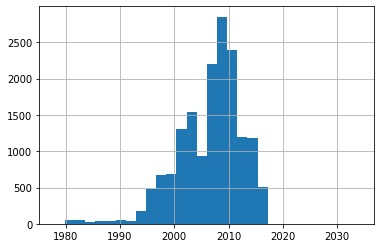

In [10]:
print_hist(games,'year_of_release')

# Анализ рождения и убывания игровых платформ

In [11]:
platform_pivot = games.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum', fill_value = 0)
top10_platform_pivot = platform_pivot.sort_values(by = 'total_sales', ascending = False)[:10]
top10_platform_pivot

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


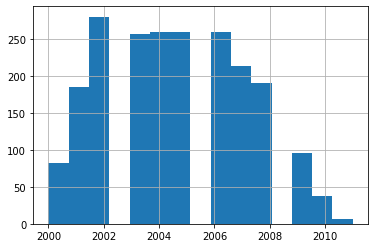

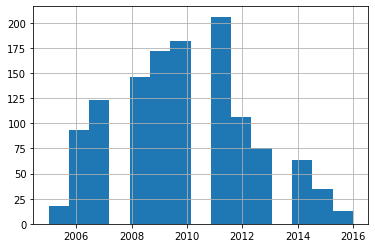

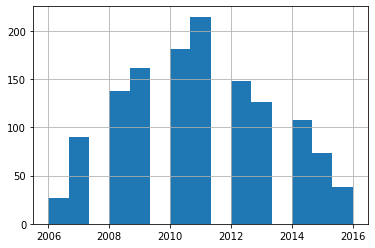

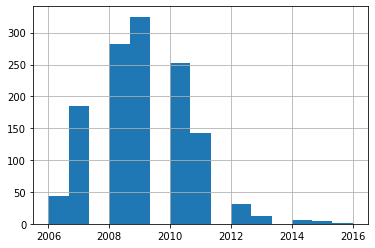

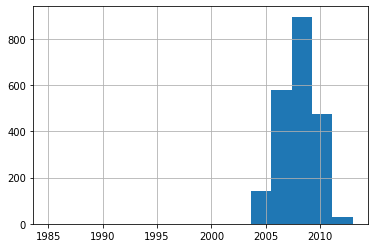

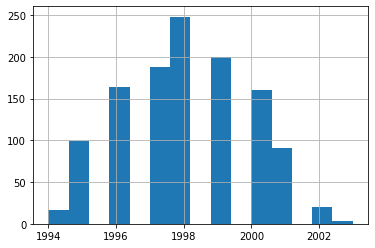

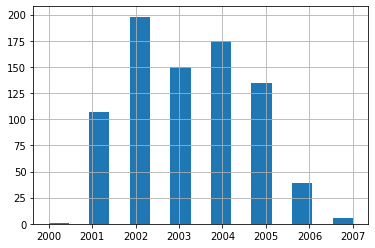

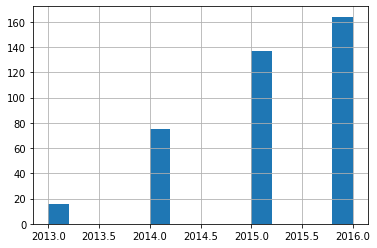

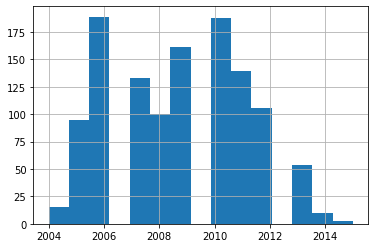

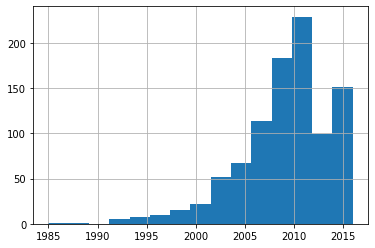

In [12]:
def top_platform_hist(games,top10_platform_pivot):
    for i in range(10):
        platform = top10_platform_pivot.index[i]
        sellect_platform_data = games.loc[games['platform']==platform]
        sellect_platform_data['year_of_release'].hist(bins=15) #label='label'
        plt.show()

#        
top_platform_hist(games,top10_platform_pivot)

Вывод: обычно новые платформы появляются и исчезают после 10 лет.

Кроме игр на ПК, уверенно наращивающим выручку по годам уже 30 лет.

У них был спад выручки после кризиса 2008 года, но после выручка восстанавливается.

Кроме ПК, рост выручки наблюдается у ps4, однако на основании анализа сроков жизни аналогичных платформ ps2 и ps3,

можно сказать что сейчас выручка на пике и в дальнейшем вероятнее всего будет постоянный спад.

# Поиск самых прибыльных жанров


Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [13]:
print(games['total_sales'].corr(games['user_score']))
print(games['total_sales'].corr(games['critic_score']))

0.08817911987579136
0.24550668717736324


Оценки критиков для игры - имеют большее положительное значение для выручки.

In [23]:
genre_pivot = games.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'mean', fill_value = 0)
genre_top10 = genre_pivot.sort_values(by = 'total_sales', ascending = False)[:10] #.sum()[0]
genre_top10

,total_sales
genre,
platform,0.932173
shooter,0.795503
role-playing,0.623872
racing,0.583403
sports,0.566980
fighting,0.527126
action,0.517711
misc,0.458577
simulation,0.446701


Мы посчитали среднюю выручки игр по жанрам. Даже в топ 10 разница между 1ым и 10ым место более чем в 2 раза.

Жанр сильно влияет на выручку!

Попробуем найти самые перспективные жанры, самой перспективной платформы в долгосрочном периоде - для ПК:

In [15]:
pc = games.loc[games['platform']=='pc']
pc_pivot = pc.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'mean', fill_value = 0)
pc_genre_top10 = pc_pivot.sort_values(by = 'total_sales', ascending = False)[:10]
pc_genre_top10

,total_sales
genre,
role-playing,0.458365
simulation,0.437583
misc,0.355417
shooter,0.305200
strategy,0.243617
sports,0.239400
action,0.185647
adventure,0.154154
racing,0.065902


<p style="color:green">Платформы проанализированны, класс! теперь можно посмотреть и на портреты пользователей по регионам</p>

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5).

Самые популярные жанры (топ-5).

In [16]:
def top5_platform_and_genre(region):
    top_platform = games.pivot_table(index = ['platform'], values = region, aggfunc = 'sum', fill_value = 0)
    top5platform = top_platform.sort_values(by = region, ascending = False)[:10]
    print('Топ 5 самых популярных платформ региона')
    print(top5platform)
    top_genre = games.pivot_table(index = ['genre'], values = region, aggfunc = 'sum', fill_value = 0)
    top5genre = top_genre.sort_values(by = region, ascending = False)[:10]
    print('Топ 5 самых популярных жанров региона')
    print(top5genre)

# Для региона NA

In [17]:
top5_platform_and_genre('na_sales')

Топ 5 самых популярных платформ региона
          na_sales
platform          
x360        602.47
ps2         583.84
wii         496.90
ps3         393.49
ds          382.40
ps          336.52
gba         187.54
xb          186.69
n64         139.02
gc          133.46
Топ 5 самых популярных жанров региона
              na_sales
genre                 
action          879.01
sports          684.43
shooter         592.24
platform        445.50
misc            407.27
racing          359.35
role-playing    330.81
fighting        223.36
simulation      181.92
puzzle          122.87


# Для региона EU

In [18]:
top5_platform_and_genre('eu_sales')

Топ 5 самых популярных платформ региона
          eu_sales
platform          
ps2         339.29
ps3         330.29
x360        270.76
wii         262.21
ps          213.61
ds          188.89
pc          142.44
ps4         141.09
gba          75.25
psp          66.68
Топ 5 самых популярных жанров региона
              eu_sales
genre                 
action          519.13
sports          376.79
shooter         317.34
racing          236.51
misc            212.74
platform        200.35
role-playing    188.71
simulation      113.52
fighting        100.33
adventure        63.54


# Для региона JP

In [19]:
top5_platform_and_genre('jp_sales')

Топ 5 самых популярных платформ региона
          jp_sales
platform          
ds          175.57
ps          139.82
ps2         139.20
snes        116.55
3ds         100.67
nes          98.65
gb           85.12
ps3          80.19
psp          76.78
wii          69.33
Топ 5 самых популярных жанров региона
              jp_sales
genre                 
role-playing    355.41
action          161.43
sports          135.54
platform        130.83
misc            108.11
fighting         87.48
simulation       63.80
puzzle           57.31
racing           56.71
adventure        52.30


# Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

# Проверка гепотизы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

In [20]:
non_user_score = games.loc[games['user_score'].isna()]
have_user_score = games.query('@games.index not in @non_user_score.index')

xbox = have_user_score.loc[have_user_score['platform']=='xone']
pc = have_user_score.loc[have_user_score['platform']=='pc']

from scipy import stats as st
import numpy as np

pages_per_session_autumn = xbox['user_score']
pages_per_session_summer = pc['user_score']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    pages_per_session_autumn, 
    pages_per_session_summer) 

print('p-значение:' , results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу, средний пользовательский рейтинг различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средний пользовательский рейтинг одинаковый")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу, средний пользовательский рейтинг различается


# Проверка гепотизы о том, что cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [18]:
non_user_score = games.loc[games['user_score'].isna()]
have_user_score = games.query('@games.index not in @non_user_score.index')

action = have_user_score.loc[have_user_score['genre']=='action']
sports = have_user_score.loc[have_user_score['genre']=='sports']

from scipy import stats as st
import numpy as np

pages_per_session_autumn = action['user_score']
pages_per_session_summer = sports['user_score']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    pages_per_session_autumn, 
    pages_per_session_summer) 

print('p-значение:' , results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу, средний пользовательский рейтинг различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средний пользовательский рейтинг одинаковый")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу, средний пользовательский рейтинг одинаковый


<p style="color:green">Проверка гипотез так же выполнена верно, супер!)</p>

# Шаг 6. Напишите общий вывод

Мы проверили обширный анализ данных, влияющих на коммерческую успешность игры.

Нашей задачей было: выявить определяющие успешность игры закономерности, что позволило нам бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Мы определили: самой перспективной платформой в долгосрочном периоде - является ПК.

Самой коммерчески успешным жанром для ПК является - "РПГ".

Не смотря на то, что северная америка является наиболее важным рынком с точки зрения суммарной выручки на регион,

ПК и РПГ, на первый взгляд - не самая удачная комерческая комбинация для региона.

Однако, хорошая реклама хорошей игры - меняет тренды, как world of warcraft например =)

Хороший бизнес - должен стабильно наращивать выручку, а хороший аналитик выбирать то, что больше всего подходит под это.

Поэтому с точки зрения перспектив - лучший выбор это игры на ПК, в жанре РПГ.